### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [3]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [4]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here

first_na = data["passenger_count"].isna().sum()
second_na = data["distance_km"].isna().sum()
print(f"Количество пропусков в passenger_count: {first_na}")
print(f"Количество пропусков в distance_km: {second_na}")

Количество пропусков в passenger_count: 145864
Количество пропусков в distance_km: 145864


Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди не отсутствующих.

In [5]:
### Your code is here

data["passenger_count"] = data["passenger_count"].fillna(data["passenger_count"].value_counts().index[0])

In [6]:
data["passenger_count"].value_counts().index[0]

np.float64(930.3997532751514)

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [7]:
### Your code is here

columns = ["vendor_id", "store_and_fwd_flag", "traffic_jam", "month_2", "month_3", "month_4", "month_5", "month_6"]

data["distance_km"] = data["distance_km"].fillna(data.groupby(columns)["distance_km"].transform("mean"))

In [8]:
### Убедимся, что пропусков не осталось

### Your code is here
first_na = data["passenger_count"].isna().sum()
second_na = data["distance_km"].isna().sum()
print(f"Количество пропусков в passenger_count: {first_na}")
print(f"Количество пропусков в distance_km: {second_na}")

Количество пропусков в passenger_count: 0
Количество пропусков в distance_km: 0


### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [9]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Your code is here

X = data.drop("log_trip_duration", axis=1)
Y = data["log_trip_duration"]

errors = []

for train_index, test_index in selector.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    errors.append(mean_squared_error(Y_test, model.predict(X_test)))


cross_val_error = np.mean(errors)
print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

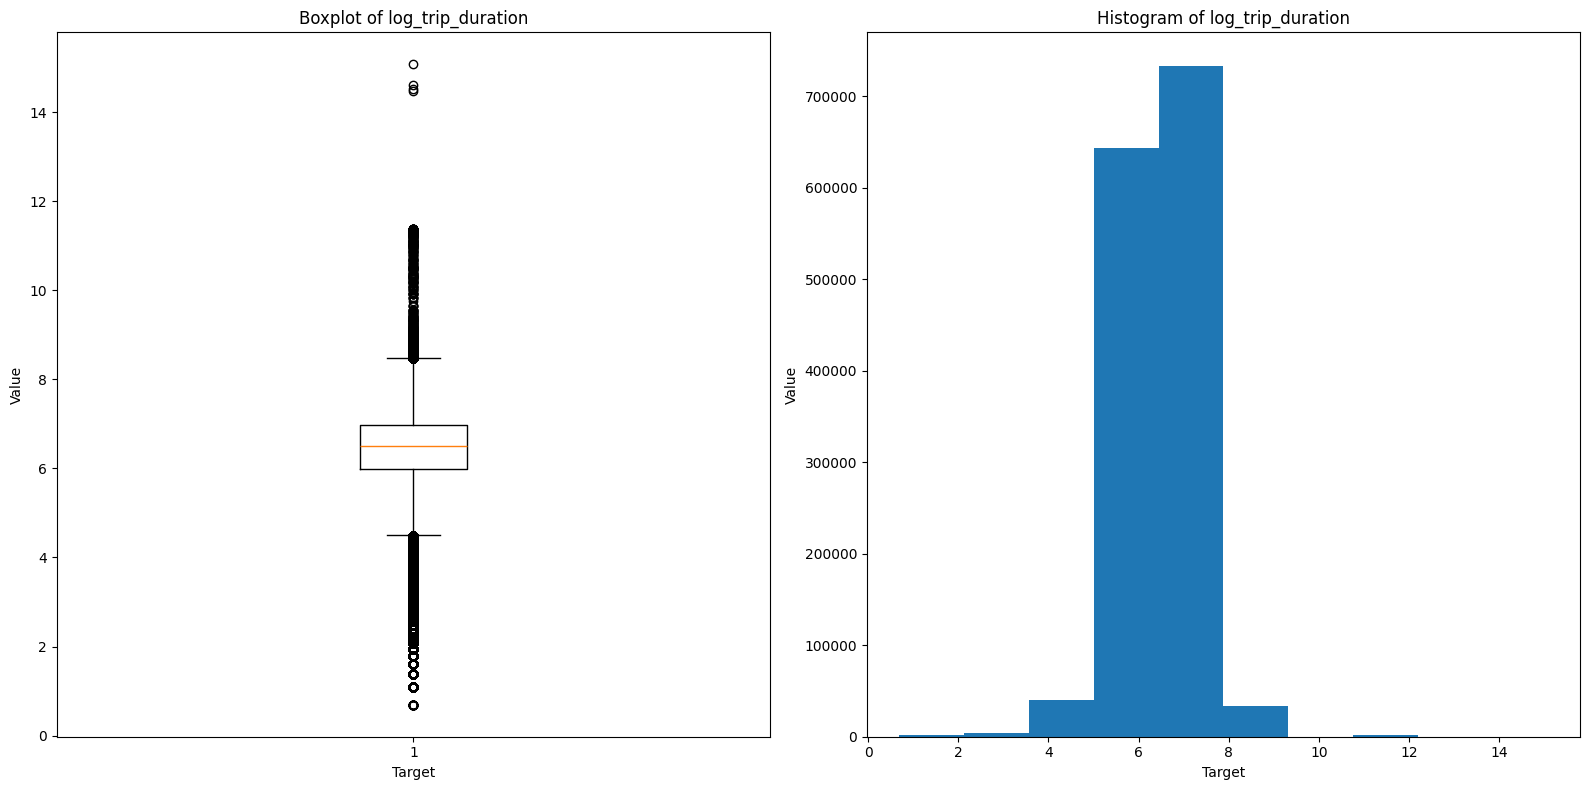

In [16]:
import matplotlib.pyplot as plt


### Your code is here
plt.style.use('default')


fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].boxplot(data["log_trip_duration"])
axes[0].set(title="Boxplot of log_trip_duration",
            xlabel="Target",
            ylabel="Value")

axes[1].hist(data["log_trip_duration"])
axes[1].set(title="Histogram of log_trip_duration",
            xlabel="Target",
            ylabel="Value")


plt.tight_layout()
plt.show()

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение; топ 0,5% значение)

In [18]:
### Your code is here
top = data["log_trip_duration"].quantile(0.995)
bottom = data["log_trip_duration"].quantile(0.005)

data.query("@bottom < log_trip_duration < @top", inplace=True)

Снова замерьте качество на кросс-валидации, используя старый selector

In [19]:
### Your code is here

X = data.drop("log_trip_duration", axis=1)
Y = data["log_trip_duration"]

errors = []

for train_index, test_index in selector.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    errors.append(mean_squared_error(Y_test, model.predict(X_test)))


cross_val_error = np.mean(errors)
print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.35
